IMPORT LIBRARIES


Top important features:
bathrooms          1.094445e+06
airconditioning    7.914267e+05
hotwaterheating    6.846499e+05
prefarea           6.298906e+05
stories            4.074766e+05
dtype: float64


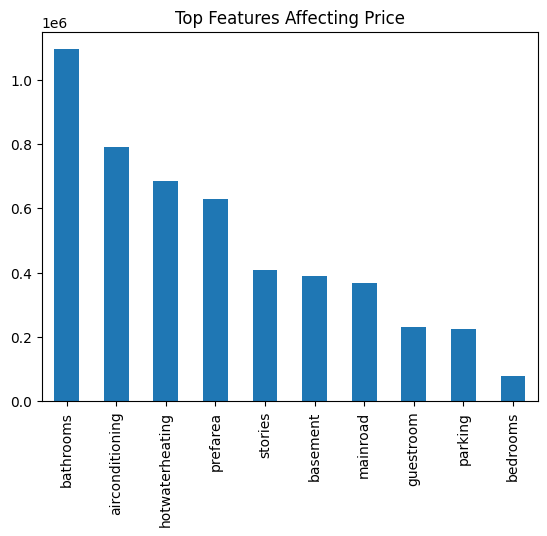

In [9]:
importance = pd.Series(model.coef_, index=X.columns)
importance = importance.sort_values(ascending=False)

print("\nTop important features:")
print(importance.head())

importance.head(10).plot(kind='bar', title="Top Features Affecting Price")
plt.show()


LOAD DATASET

In [10]:
print("Loading dataset...")

df = pd.read_csv("Housing.csv")

print("Dataset loaded successfully!")
print("Shape:", df.shape)

df.head()


Loading dataset...
Dataset loaded successfully!
Shape: (545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


DATA EXPLORATION

In [11]:
print("Missing values:")
print(df.isnull().sum())

print("\nData types:")
print(df.dtypes)


Missing values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Data types:
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


DATA CLEANING

In [12]:
# Remove missing values
df = df.dropna()

# Convert yes/no columns
for col in df.columns:
    if df[col].dtype == "object":
        unique_vals = df[col].str.lower().unique()
        if set(unique_vals).issubset({"yes", "no"}):
            df[col] = df[col].str.lower().map({"yes": 1, "no": 0})

# One-hot encode remaining categorical columns
df = pd.get_dummies(df, drop_first=True)

print("Data cleaned successfully!")
df.head()


Data cleaned successfully!


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


FEATURESELECTION

In [13]:
target_column = "price"

X = df.drop(target_column, axis=1)
y = df[target_column]

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (545, 13)
Target shape: (545,)


TRAIN TEST SPLIT

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training and testing data split done!")


Training and testing data split done!


TRAIN LINEAR REGRESSION MODEL

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Linear Regression model trained!")


Linear Regression model trained!


FEATURE IMPORTANCE

Top important features:
bathrooms          1.094445e+06
airconditioning    7.914267e+05
hotwaterheating    6.846499e+05
prefarea           6.298906e+05
stories            4.074766e+05
dtype: float64


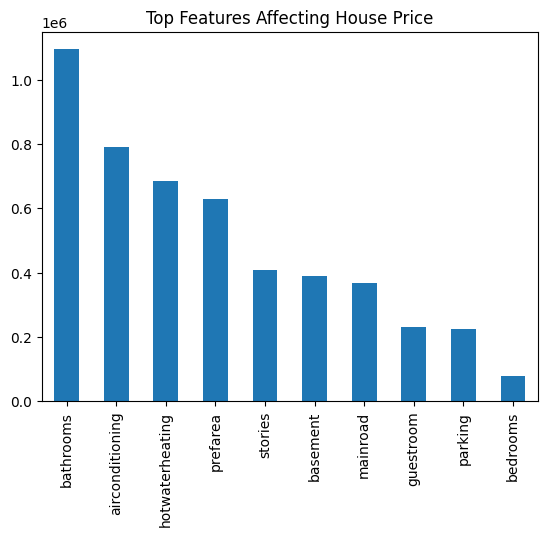

In [16]:
importance = pd.Series(model.coef_, index=X.columns)
importance = importance.sort_values(ascending=False)

print("Top important features:")
print(importance.head())

importance.head(10).plot(kind="bar", title="Top Features Affecting House Price")
plt.show()


PREDICTIONS

In [17]:
y_pred = model.predict(X_test)
print("Predictions completed!")


Predictions completed!


MODEL EVALUATION

In [18]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 1754318687330.6628
R2 Score: 0.6529242642153186


VISUVALIZATION

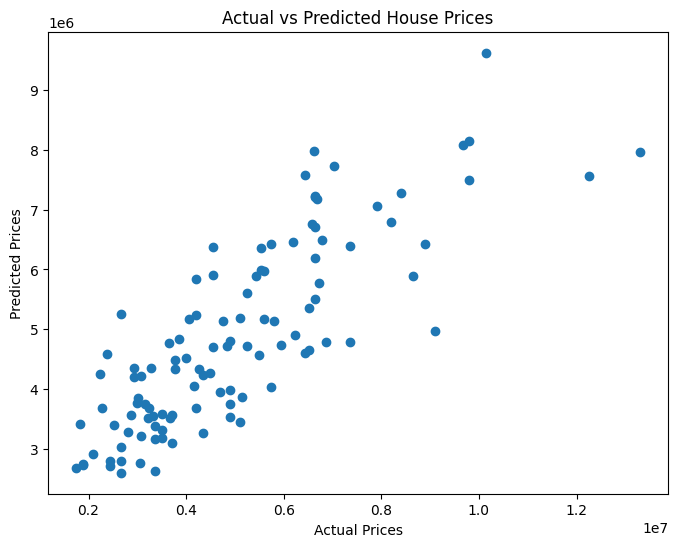

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


MULTI MODEL COMPARISION

In [20]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor()
}

print("\nMODEL COMPARISON:")

for name, m in models.items():
    m.fit(X_train, y_train)
    preds = m.predict(X_test)
    score = r2_score(y_test, preds)
    print(f"{name} R2 Score: {score:.4f}")



MODEL COMPARISON:
Linear Regression R2 Score: 0.6529
Ridge Regression R2 Score: 0.6525
Lasso Regression R2 Score: 0.6529
Random Forest R2 Score: 0.6211


USER INPUT PREDICTION

In [21]:
sample = X.iloc[[0]]
custom_input = sample.copy()
custom_input[:] = 0

custom_input.iloc[0, 0] = 3000  # example area

predicted_price = model.predict(custom_input)[0]

print("Predicted price for custom house:", predicted_price)


Predicted price for custom house: 967938.7712316029


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_31184\920223813.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  custom_input[:] = 0
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_31184\920223813.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  custom_input[:] = 0


SAVE MODEL ANDCLEANED DATASET

In [23]:
import joblib

df.to_csv("cleaned_house_data.csv", index=False)
joblib.dump(model, "house_price_model.pkl")

print("Saved cleaned_house_data.csv")
print("Saved house_price_model.pkl")



Saved cleaned_house_data.csv
Saved house_price_model.pkl
